##**PYTHON DATA ANALYSIS PROJECT**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:

df = pd.read_csv("Blinkit.cleaned.data.csv")
print(df.head(10))
print("rows and columns imported\n",df.shape)

  Item_fat_content Item_Identifier              Item_Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   
5          low fat           FDS52           Frozen Foods   
6          Low Fat           NCU05     Health and Hygiene   
7          Low Fat           NCD30              Household   
8          Low Fat           FDW20  Fruits and Vegetables   
9          Low Fat           FDX25                 Canned   

   Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT0

In [30]:
print("column names\n",df.columns)

column names
 Index(['Item_fat_content', 'Item_Identifier', 'Item_Type',
       'Outlet_Establishment_Year', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Visibility',
       'Item_Weight', 'Sales', 'Rating'],
      dtype='object')


In [33]:
print("datatypes of columns\n", df.dtypes)

datatypes of columns
 Item_fat_content              object
Item_Identifier               object
Item_Type                     object
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
Item_Visibility              float64
Item_Weight                  float64
Sales                        float64
Rating                       float64
dtype: object


##**cleaning data**


In [40]:
print(df["Item_fat_content"].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [46]:
df["Item_fat_content"]=df["Item_fat_content"].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

In [44]:
print(df["Item_fat_content"].unique())

['Regular' 'Low Fat']


##**Kpi requiremments**

In [66]:
#total sales 
Total_Sales= df['Sales'].sum()
Average_Sales= df['Sales'].mean()
No_of_items_sold=df['Sales'].count()
Average_rating= df['Rating'].mean()

print(f"TOTAL SALES:${Total_Sales:,.0f}")
print(f"AVERAGE SALES:${Average_Sales:,.0f}")
print(f"NO OF ITEMS SOLD:{No_of_items_sold:,.0f}")
print(f"AVERAGE RATINGS:{Average_rating:,.0f}")

      


TOTAL SALES:$1,201,681
AVERAGE SALES:$141
NO OF ITEMS SOLD:8,523
AVERAGE RATINGS:4


##**Chart Requirements**

Item_fat_content
Low Fat    776319.6884
Regular    425361.8044
Name: Sales, dtype: float64


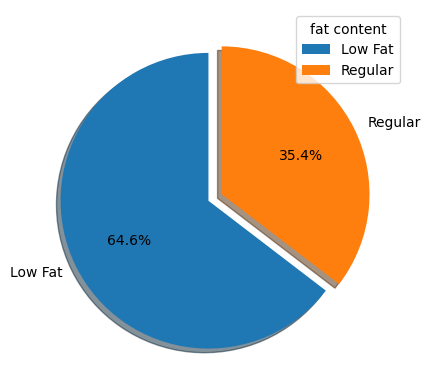

In [99]:
#sales by fat content
sales_by_fat=df.groupby('Item_fat_content')
dataforchart=sales_by_fat['Sales'].sum()
print(dataforchart)
plt.pie(dataforchart,shadow=True,autopct='%1.1f%%',labels=dataforchart.index,startangle=90,explode=[0.1,0])

plt.legend(title="fat content")
plt.show()

Item_Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9224
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4616
Canned                    90706.7290
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1670
Breads                    35379.1198
Hard Drinks               29334.6806
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Sales, dtype: float64


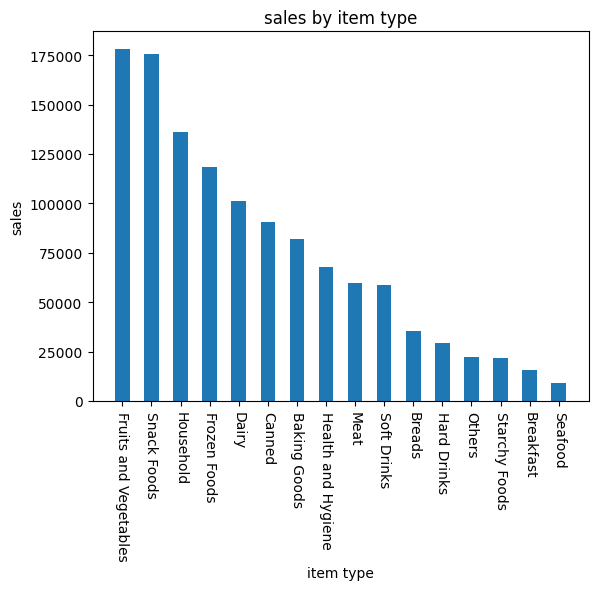

In [119]:
#total sales by item type 
grouped=df.groupby('Item_Type')
dataforchart= grouped['Sales'].sum().sort_values(ascending=False)
print(dataforchart)
plt.bar(dataforchart.index,dataforchart.values,width=0.5)
plt.xlabel("item type")
plt.xticks(rotation=-90)
plt.ylabel("sales")
plt.title("sales by item type")
plt.show()


Item_fat_content          Low Fat      Regular
Outlet_Location_Type                          
Tier 1                215047.9126  121349.8994
Tier 2                254464.7794  138685.8682
Tier 3                306806.9964  165326.0368


Text(0, 0.5, 'sales')

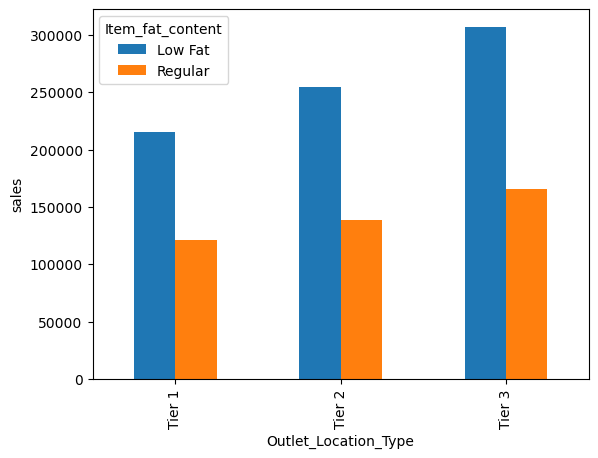

In [139]:
#sales by item fat contenta nd location 

grouped=df.groupby(['Outlet_Location_Type','Item_fat_content'])
dataforchart=grouped['Sales'].sum().unstack()
print(dataforchart)
ax=dataforchart.plot(kind='bar')
plt.ylabel("sales")




Outlet_Establishment_Year
2011     78131.5666
2012    130476.8598
2014    131809.0156
2015    130942.7802
2016    132113.3698
2017    133103.9070
2018    204522.2570
2020    129103.9604
2022    131477.7764
Name: Sales, dtype: float64


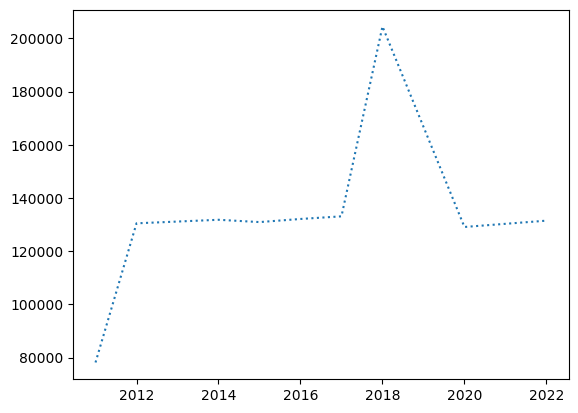

In [147]:
grouped=df.groupby('Outlet_Establishment_Year')
dataforchart=grouped['Sales'].sum()
print(dataforchart)
plt.plot(dataforchart.index,dataforchart.values,linestyle=':')

Outlet_Size
High      248991.5860
Medium    507895.7364
Small     444794.1704
Name: Sales, dtype: float64


([<matplotlib.patches.Wedge at 0xe972bf8>,
 [Text(-0.6665336270703224, 0.8750616686751171, 'High'),
  Text(-0.5388111167358788, -0.959000824025629, 'Medium'),
  Text(1.0097264839414875, 0.4364085558592558, 'Small')],
 [Text(-0.36356379658381216, 0.47730636473188204, '20.7%'),
  Text(-0.29389697276502474, -0.5230913585594339, '42.3%'),
  Text(0.5507599003317204, 0.23804103046868497, '37.0%')])

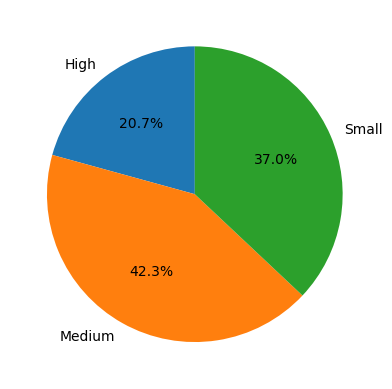

In [155]:
#sales by outlet size
grouped=df.groupby('Outlet_Size')
dataforchart=grouped['Sales'].sum()
print(dataforchart)
plt.pie(dataforchart.values,labels=dataforchart.index,autopct='%.1f%%',startangle=90)